
# Science of Honesty
Credit: @Data Colada, Shu Et Al. 2012



Companies and governments often rely on systems of trust which are often susceptible to misuse. Take for example tax reporting. The IRS has identified a significant tax gap of between $ \$400 $ and $ \$700 $ billion, with roughly 80% attributed to underreported income on tax forms.

<img src="https://raw.githubusercontent.com/sensesensibilityscience/datascience/master/2024/bad_science/data/taxgap.png" 
        alt="1040 form" 
        width="500" 
        style="display: block; margin: 0 auto" />

Current solutions rely on signing a honestly pledge at the **bottom** of the form.


<blockquote>
    "Under penalties of perjury, I declare that I have examined this return and accompanying schedules and statements, and to the best of my knowledge and belief, they are true, correct, and complete."
</blockquote>

<img src="https://raw.githubusercontent.com/sensesensibilityscience/datascience/master/2024/bad_science/data/1040.png" 
        alt="tax gap table" 
        width="500" 
        style="display: block; margin: 0 auto" />
<center>
    <i>
    Example of the IRS form 1040 with the “honesty pledge” at the bottom.
    </i>
</center>


Your peers have come up with a clever idea which may be able to address this far reaching problem––**what if instead of asking people to sign the standard honesty pledge at the bottom, we asked them to sign it at the top?**

After all, having individuals sign an honesty pledge at the top of a document may prompt early self-reflection and align their behaviors with societal honesty norms before starting the task––potentially increasing accurate reporting. In contrast, a pledge at the bottom may be less effective, as it comes after actions have already been taken––reducing its impact on behavior.

## Self-Reported Mileage for Auto Insurance

Another place where honestly matters is when drivers report their current odometer mileage when applying or renewing their auto insurance plans. The odometer records the distance travelled by a vehicle throughout its lifetime. As higher mileage cars have higher insurance rates, drivers have an incentive to be dishonest and underreport how much they have driven in the past year(s).

Given this information we seek to construct a field experiment. Partnering with an auto insurance firm we seek to test our hypothesis that **signing a honesty pledge at the top of the insurance application/renewal document increases honesty when self-reporting odometer mileage**. 

<hr/>

**Question 1** How would you expect an honest response to differ from a dishonest response (with respect to the number of miles driven over some time period)? Would one value be higher than the other, if so which one?

*Replace This Text*

**Question 2**
Recall randomized controlled trials (RCTs) from the lesson: *Correlation and Causation*. How would you design an experiment to be carried out by the insurance firm to test our hypothesis? Describe every aspect of this RCT.

*Replace This Text*

One of your peers has conducted an experiment and collected the data as follows: 

Your peer said that they were able to run an experiement with $N = 13,488$ drivers who were renewing their insurance. At this point, all drivers are existing clients of the firm, who have previously submitted a form with the standard bottom signature where they reported their cars' current milage (**Odom Reading $x$ (Previous)**).

They said that they randomly assigned each driver to one of two policy renewal forms: 

1) featuring the standard placement of the statement "I promise that the information I am providing is true" at bottom of the document **(OMR Version: Sign Bottom)**.
2) featuring the same statement relocated to the top of the document **(OMR Version: Sign Top)**.

In the forms, they were asked to self-report their updated **odometer mileage** of their car(s) after some time period has past from the previous period. This is recorded as **Odom Reading $x$ (Update)**.
 
Remember, **our hypothesis was that those who signed at the top were less inclined to lie than those who signed at the bottom.**

After some time, the firm and your peer returned with the following data set:

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

df = pd.read_csv('data/drivingdata.csv')
df = df.drop(columns=['Policy # (masked)'])
df

,OMR Version,Odom Reading 1 (Previous),Odom Reading 1 (Update),Odom Reading 2 (Previous),Odom Reading 2 (Update),Odom Reading 3 (Previous),Odom Reading 3 (Update),Odom Reading 4 (Previous),Odom Reading 4 (Update)
0,Sign Top,896,39198,NaN,NaN,NaN,NaN,NaN,NaN
1,Sign Bottom,21396,63511,32659.0,47605.0,NaN,NaN,NaN,NaN
2,Sign Bottom,21340,37460,44998.0,59002.0,NaN,NaN,NaN,NaN
3,Sign Bottom,23912,59136,NaN,NaN,NaN,NaN,NaN,NaN
4,Sign Bottom,16862,59292,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
13483,Sign Top,20970,61552,42391.0,46815.0,NaN,NaN,NaN,NaN
13484,Sign Top,22606,56382,NaN,NaN,NaN,NaN,467.0,27441.0
13485,Sign Bottom,30700,32916,89680.0,139570.0,NaN,NaN,NaN,NaN
13486,Sign Top,29884,35459,NaN,NaN,NaN,NaN,NaN,NaN


In the above data set, each row represents a sign form response by a policy holder. 
* **"OMR Version"** denotes which type of a policy renewal form they were randomly assigned to: either **"Sign Top"** or **"Sign Bottom"**.
* **Odom Reading $x$ (Previous)** refers to the mileage that had been previously reported (all signed at the bottom) for vehicle $x$, this data was provided by the insurance firm. **Odom Reading $x$ (Update)** is our dependent variable, which is the new self-reported mileage after the sign top or sign bottom form was administered during the renewal (on average approx. 2 years after "Previous"). 

**Task 0** often times data does not come in perfectly, in this case we would like some way to "average" the mileage driven per policy holder if they have multiple cars, further, for those who do not have all 4 possible cars they have some NaN (not a number) values. Please create the following new columns using Pandas:
#what is a NaN, why does it happen? what does it mean here

* Odom Reading All Avg (Previous): the mean of all the cars' Odom Readings at (Previous), skip all NaN values.
* Odom Reading All Avg (Update): the mean of all the cars' Odom Readings at (Update), skip all NaN values.
* Dif All: Simply the difference between the previous two columns we just created, this will represent the miles driven.

In [51]:
#complete the "..." 
df['Odom Reading All Avg (Previous)'] = df[...].mean(axis=..., skipna=...)

df['Odom Reading All Avg (Update)'] = df[].mean(axis=..., skipna=...)

df['Diff All'] = ... - ...

df.head()

,OMR Version,Odom Reading 1 (Previous),Odom Reading 1 (Update),Odom Reading 2 (Previous),Odom Reading 2 (Update),Odom Reading 3 (Previous),Odom Reading 3 (Update),Odom Reading 4 (Previous),Odom Reading 4 (Update),Odom Reading All Avg (Previous),Odom Reading All Avg (Update),Diff All,Miles Driven
0,Sign Top,896,39198,NaN,NaN,NaN,NaN,NaN,NaN,Ellipsis,Ellipsis,Ellipsis,38302
1,Sign Bottom,21396,63511,32659.0,47605.0,NaN,NaN,NaN,NaN,Ellipsis,Ellipsis,Ellipsis,42115
2,Sign Bottom,21340,37460,44998.0,59002.0,NaN,NaN,NaN,NaN,Ellipsis,Ellipsis,Ellipsis,16120
3,Sign Bottom,23912,59136,NaN,NaN,NaN,NaN,NaN,NaN,Ellipsis,Ellipsis,Ellipsis,35224
4,Sign Bottom,16862,59292,NaN,NaN,NaN,NaN,NaN,NaN,Ellipsis,Ellipsis,Ellipsis,42430


In [ ]:
<img src="https://i.sstatic.net/DL0iQ.jpg" 
        alt="1040 form" 
        width="500" 
        style="display: block; margin: 0 auto" />

In [65]:
#SOLN

df['Odom Reading All Avg (Previous)'] = df[['Odom Reading 1 (Previous)', 'Odom Reading 2 (Previous)', 
                                            'Odom Reading 3 (Previous)', 'Odom Reading 4 (Previous)']].mean(axis=1, skipna=True)

df['Odom Reading All Avg (Update)'] = df[['Odom Reading 1 (Update)', 'Odom Reading 2 (Update)', 
                                          'Odom Reading 3 (Update)', 'Odom Reading 4 (Update)']].mean(axis=1, skipna=True)

df['Diff All'] = df['Odom Reading All Avg (Update)'] - df['Odom Reading All Avg (Previous)']

df.head()

,OMR Version,Odom Reading 1 (Previous),Odom Reading 1 (Update),Odom Reading 2 (Previous),Odom Reading 2 (Update),Odom Reading 3 (Previous),Odom Reading 3 (Update),Odom Reading 4 (Previous),Odom Reading 4 (Update),Odom Reading All Avg (Previous),Odom Reading All Avg (Update),Diff All
0,Sign Top,896,39198,NaN,NaN,NaN,NaN,NaN,NaN,896.0,39198.0,38302.0
1,Sign Bottom,21396,63511,32659.0,47605.0,NaN,NaN,NaN,NaN,27027.5,55558.0,28530.5
2,Sign Bottom,21340,37460,44998.0,59002.0,NaN,NaN,NaN,NaN,33169.0,48231.0,15062.0
3,Sign Bottom,23912,59136,NaN,NaN,NaN,NaN,NaN,NaN,23912.0,59136.0,35224.0
4,Sign Bottom,16862,59292,NaN,NaN,NaN,NaN,NaN,NaN,16862.0,59292.0,42430.0


In [2]:
%pip install xlrd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

df = pd.read_excel('data/DrivingdataAll.xls')
df = df.drop(columns=['Policy # (masked)', 'Count1', 'Count2', 'Count3', 'Count4'])
df = df.iloc[:, :13]
df

Note: you may need to restart the kernel to use updated packages.


,OMR Version,Odom Reading 1 (Previous),Odom Reading 1 (Update),Odom Reading 2 (Previous),Odom Reading 2 (Update),Odom Reading 3 (Previous),Odom Reading 3 (Update),Odom Reading 4 (Previous),Odom Reading 4 (Update),Odom Reading All (Previous),Odom Reading All (Update),Diff All,#Cars in Policy
0,Sign Top,896,39198,NaN,NaN,NaN,NaN,NaN,NaN,896.0,39198.0,38302.0,1
1,Sign Bottom,21396,63511,32659.0,47605.0,NaN,NaN,NaN,NaN,27027.5,55558.0,28530.5,2
2,Sign Bottom,21340,37460,44998.0,59002.0,NaN,NaN,NaN,NaN,33169.0,48231.0,15062.0,2
3,Sign Bottom,23912,59136,NaN,NaN,NaN,NaN,NaN,NaN,23912.0,59136.0,35224.0,1
4,Sign Bottom,16862,59292,NaN,NaN,NaN,NaN,NaN,NaN,16862.0,59292.0,42430.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13483,Sign Top,20970,61552,42391.0,46815.0,NaN,NaN,NaN,NaN,31680.5,54183.5,22503.0,2
13484,Sign Top,22606,56382,NaN,NaN,NaN,NaN,467.0,27441.0,11536.5,41911.5,30375.0,2
13485,Sign Bottom,30700,32916,89680.0,139570.0,NaN,NaN,NaN,NaN,60190.0,86243.0,26053.0,2
13486,Sign Top,29884,35459,NaN,NaN,NaN,NaN,NaN,NaN,29884.0,35459.0,5575.0,1


**Question 3** What pattern of data would we expect if our hypothesis was false? Likewise, what would we expect if it was true?

*Replace This Text*

**Question 4**
Does this experiment satisfy each of the criteria for an RCT?

*Replace This Text*

Here we have plotted the self-reported miles driven between "Previous" and "Update", seperated by OMR version (Sign Top vs Sign Bottom). 

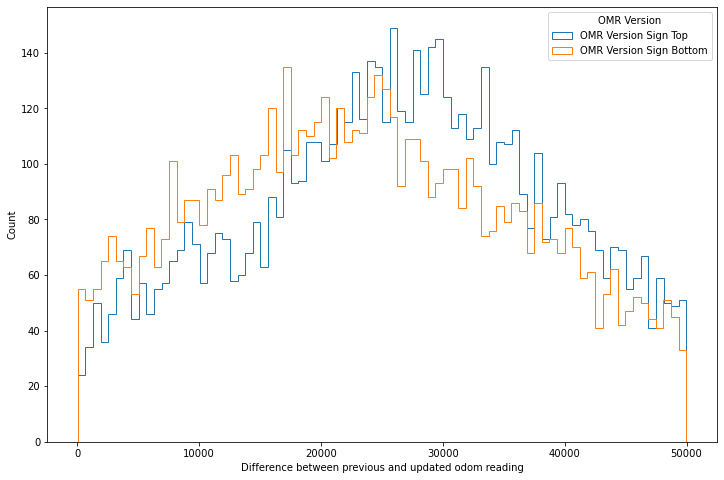

In [93]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))

for version in df["OMR Version"].unique():
    plt.hist(df[df["OMR Version"] == version]["Diff All"], 
             bins=80, label=f'OMR Version {version}', histtype="step")


plt.xlabel("Difference between previous and updated odom reading")
plt.ylabel("Count")
plt.legend(title="OMR Version")
plt.show()



**Question 5** Based on this plot, did changing the placement of the signature change the self-reported odometer readings?

*Replace This Text*

**Task 1**

* Previous part: intuitive but vague, hard to take into effect concepts of spread visually
* Visually we can see the two distributions have different means, let's visualize this more percisely by plotting their means and errors bars.
* What are error bars for? Describes how much our bar can fluctautate by chance, here we're looking at how the mean could fluctuate between samples.

$$\text{ Error Bar on Mean } = \frac{\text{Sample Standard Deviation}}{\sqrt{\text{Sample Size}}}$$


  
<details open>

<summary><i>[Optional] Standard Error of the Mean </i></summary>



We use standard error here instead of what you may already know as standard deviation as we wish to better understand how accurate our sample mean is to the true population mean. Where the standard deviation tells us how much spread there is between individual points in a single sample or population, the standard error tells us how much the sample mean is likely to vary if we took many samples from the same population (we can almost think of it as taking the standard deviation of the sampling distribution). 

$$ SE = \frac{S}{\sqrt{n}}$$

Here $S$ represents the standard deivation and $n$ the sample size. 

Imagine you’re a bakery baking multiple batches of cookies and wish to know how much the average cookie weighs. For each batch you can weigh each cookie and obtain the mean and standard deviation of the batch. We can consider the standard error as our confidence of the average weight calculated from one batch. If we make more batches $n$ increases, and each batch has a similar average weight, then our standard error will be small. Thus more confident that the average weight from a single batch is close to the true average for all batches. And vice versa. 

* SD: Measure of the spread of individual observations in one group
* SE: Comparing averages, and measure of confidence in your estimates’ accuracy.

</details>

In [31]:
# First lets calculate the difference for Odom reading 1, that is creating a "Difference" dataframe that is equal to the difference between the Update and Previous dataframes for Odom Reading 1.

df['Difference'] = ...

# Now let's split the data into two dataframes based on the "OMR Version" our experimental variable.
df_top = ...
df_bottom = ...

# Now use .mean() and .std() to calculate the mean and standard error (recall the formula above) for both Sign Top and Sign Bottom dataframes.
mean_top = ...

# break down partwise, remove SE jargon
se_top = df_top['Difference'].std() / np.sqrt(len(df_top))

mean_bottom = df_bottom['Difference'].mean()
se_bottom = df_bottom['Difference'].std() / np.sqrt(len(df_bottom))

# Use plt to plot a bar chart with standard error bars. Remember to label your axis and give it a title.
plt.figure(figsize=(8, 6))
plt.bar(['Sign Top', 'Sign Bottom'], [mean_top, mean_bottom], yerr=[se_top, se_bottom], capsize=5, color=['blue', 'orange'])
plt.ylabel('Mean Difference in Odometer Reading')
plt.title('Mean Difference in Odometer Reading by OMR Version')
plt.show()

TypeError: 'ellipsis' object is not subscriptable

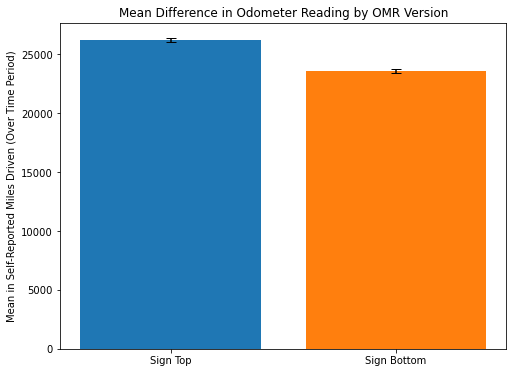

In [80]:
#####SOLN

# First lets calculate the difference for Odom reading 1, that is creating a "Difference" dataframe that is equal to the difference between the Update and Previous dataframes for Odom Reading 1.

df['Difference'] = df['Odom Reading 1 (Update)'] - df['Odom Reading 1 (Previous)']

# Now let's split the data into two dataframes based on the "OMR Version" our experimental variable.
df_top = df[df['OMR Version'] == 'Sign Top']
df_bottom = df[df['OMR Version'] == 'Sign Bottom']

# Now use .mean() and .std() to calculate the mean and standard error (recall the formula above) for both Sign Top and Sign Bottom dataframes.
mean_top = df_top['Difference'].mean()
se_top = df_top['Difference'].std() / np.sqrt(len(df_top))

mean_bottom = df_bottom['Difference'].mean()
se_bottom = df_bottom['Difference'].std() / np.sqrt(len(df_bottom))

# Use plt to plot a bar chart with standard error bars. Remember to label your axis and give it a title.
plt.figure(figsize=(8, 6))
plt.bar(['Sign Top', 'Sign Bottom'], [mean_top, mean_bottom], yerr=[se_top, se_bottom], capsize=5, color=['tab:blue', 'tab:orange'])
plt.ylabel('Mean in Self-Reported Miles Driven (Over Time Period)')
plt.title('Mean Difference in Odometer Reading by OMR Version')
plt.show()

**Question 6** Interpret the height of each bar and their respective error bars. Based on this plot, did changing the placement of the signature change the self-reported odometer readings?

*Replace This Text*

**Question 7**
* Recall Hypothesis
* Based on plot what does it say about our hyp?
* Confidence?
* How should companies and policy makers interpret and act on these results?

*Replace This Text*

**Recall: Publishing & Peer Review (10.2):**
New results are evaluated by other experts in the same field to determine whether they are valid. This only reduces confirmation bias insofar as reviewers don't share the same biases.

**Question 8**
Now: take the role of a [peer-reviewer](https://www.pnas.org/reviewer). Please reflect and evaluate the research design, collection, analysis and outcome of our findings above. Are there any inconsistencies that immediately stand out?

*Replace This Text*

Sometimes, faults in studies aren't in their design but rather in the interpretation or underlying data of the experiment. In this lab we'll learn about pathological science and fraudulent and tools we can use to detect them and why certain researchers may be incentivized or pushed to output fraudulent or pathological science papers.

# TEXT BREAK HERE?


# Investigation #1: Random Assignment
Recall from earlier you evaluated the effectiveness of this experiment as a peer-reviewer. In fact, the experimental design is a classical example of a Randomized Control Trial (RCT).

One of the important properties of RCTs is random assignment into intervention or control groups. Randomly assigning intervention treatments ensures each participant has an equal chance of receiving any either the control or intervention, minimizing bias. This creates comparable groups, allowing differences in outcomes to be attributed to the intervention. Without randomization, pre-existing differences could skew results, reducing internal validity. 

**Question 9**
Please answer the following short answers:

1) Why randomly assign? What would happen if we had men in our control group and women in the intervention group?
2) If interventions were randomly assigned, would we expect the distributions of odometer readings of the two groups –– prior to any intervention –– to be similar or different? 
3) Suppose we see a difference in the distributions of odometer readings before the intervention, what does that say about the randomized assignment step of our experiment?


*Replace This Text*
1) ...
2) ...
3) ...

Let's plot the distributions of each of our groups!

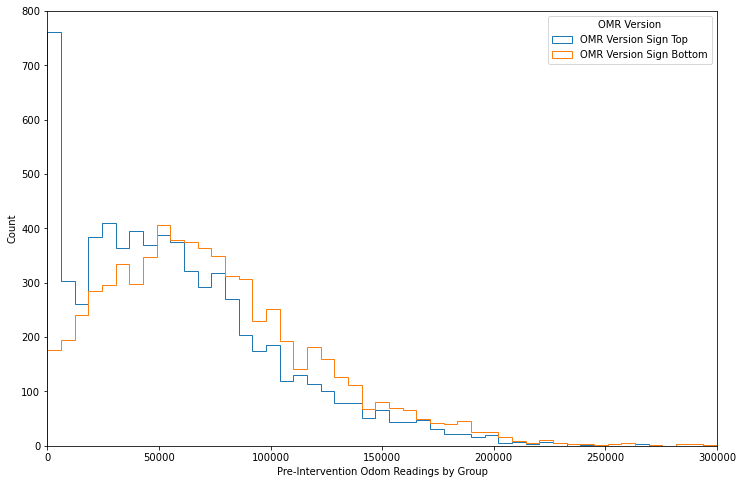

In [101]:
plt.figure(figsize=(12, 8))

bin_edges = np.linspace(0, 0.3e6, 50)

for version in df["OMR Version"].unique():
    plt.hist(df[df["OMR Version"] == version]["Odom Reading All Avg (Previous)"], 
             bins=bin_edges, histtype="step", density=False, label=f'OMR Version {version}')

plt.xlabel("Pre-Intervention Odom Readings by Group")
plt.ylabel("Count")
plt.xlim(0, 0.3e6)
plt.legend(title="OMR Version")
plt.show()

**Question 10** Point out the qualitative differences you see between the sign top and sign bottom distributions. Anything unexpected? What does that say about the effectiveness of randomized assignment in this experiment? 

*Replace This Text*

**Takeaway** If the two pre-intervention distributions seem significantly different, it suggests that there could be a systematic difference between the control and intervention groups. Thus suggesting the randomized assignment step may have been done incorrectly. Due to this pre-intervention systematic difference, any post-intervention difference between the two groups cannot be purely attributed to the intervention itself (which should be the only difference between the two groups).

**Task 2** Let's investigate this further. Like in the previous task, let's plot out the mean Odometer readings by OMR version and their respective error bars.

In [35]:
# Use the Pandas groupby method to find the means of the two groups, use the error bar calculations from Task 1.

mean_by_version = ...

df_top = ...
df_bottom = ...

mean_top = ...
mean_bottom = ...

std_top = ...
sqrt_n_top = ...
error_bar_top = ... #recall our formula for error bars introduced in Task 1.

std_bottom = ...
sqrt_n_bottom = ...
error_bar_bottom = ... #recall our formula for error bars introduced in  Task 1.


#Use plotly to plot the barcharts with error bars. Label the axis and give it a title.
...
...
...
...
plt.show()

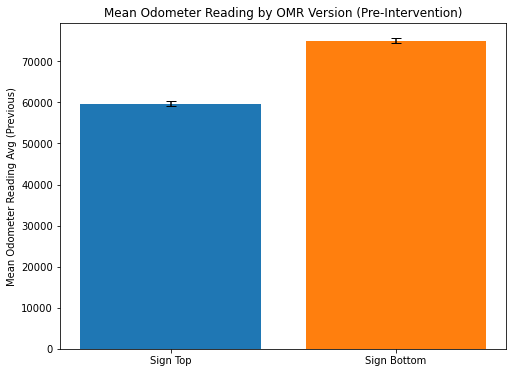

In [110]:
###SOLN:
mean_by_version = df.groupby('OMR Version')['Odom Reading All Avg (Previous)'].mean()

df_top = df[df['OMR Version'] == 'Sign Top']
df_bottom = df[df['OMR Version'] == 'Sign Bottom']

mean_top = df_top['Odom Reading All Avg (Previous)'].mean()
mean_bottom = df_bottom['Odom Reading All Avg (Previous)'].mean()

std_top = df_top['Odom Reading All Avg (Previous)'].std()
sqrt_n_top = np.sqrt(len(df_top))
error_bar_top = std_top / sqrt_n_top

std_bottom = df_bottom['Odom Reading All Avg (Previous)'].std()
sqrt_n_bottom = np.sqrt(len(df_bottom))
error_bar_bottom = std_bottom / sqrt_n_bottom


plt.figure(figsize=(8, 6))
plt.bar(['Sign Top', 'Sign Bottom'], [mean_top, mean_bottom], yerr=[error_bar_top, error_bar_bottom], capsize=5, color=['tab:blue', 'tab:orange'])
plt.ylabel('Mean Odometer Reading Avg (Previous)')
plt.title('Mean Odometer Reading by OMR Version (Pre-Intervention)')
plt.show()

**Question 9** Do your findings suggest the experiment implemented random assignment? Discuss whether and how the observed differences in baseline (pre intervention) odometer readings could impact the validity of the experiment's conclusions about the intervention effect (recall, what are we testing in our hypothesis test previous?).

*Replace This Text*

# Investigation #2: Distribution of Miles Driven

**Consider the following distributions which we have generated arbitrarily from random distributions.**

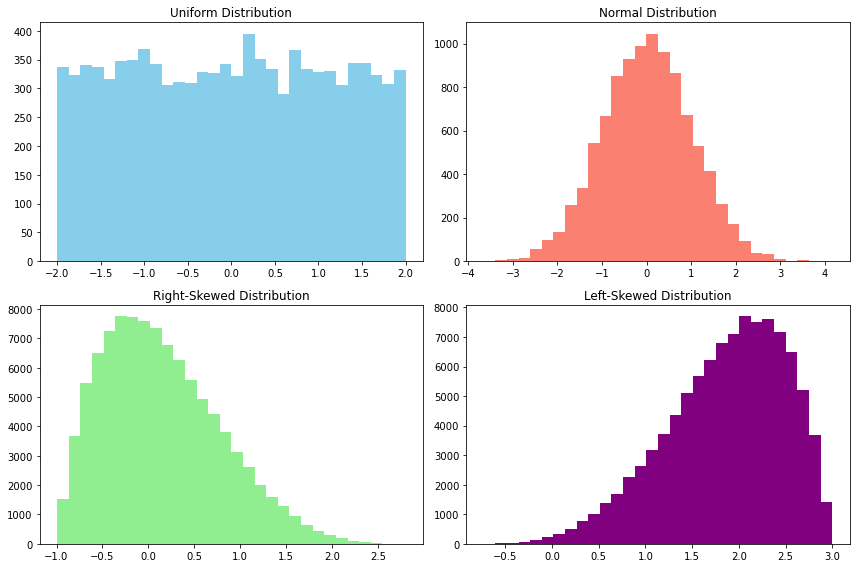

In [106]:
np.random.seed(1)
data_uniform = np.random.uniform(-2, 2, 10000)
data_normal = np.random.normal(0, 1, 10000)
data_left_skewed = stats.beta(2, 5).rvs(100000) * 4 - 1 
data_right_skewed = stats.beta(5, 2).rvs(100000) * 4 - 1

fig, ax = plt.subplots(2, 2, figsize=(12, 8))

# Uniform
ax[0, 0].hist(data_uniform, bins=30, color='skyblue')
ax[0, 0].set_title('Uniform Distribution')

# Normal
ax[0, 1].hist(data_normal, bins=30, color='salmon')
ax[0, 1].set_title('Normal Distribution')

# Right-Skewed
ax[1, 0].hist(data_left_skewed, bins=30, color='lightgreen')
ax[1, 0].set_title('Right-Skewed Distribution')

# Left-Skewed
ax[1, 1].hist(data_right_skewed, bins=30, color='purple')
ax[1, 1].set_title('Left-Skewed Distribution')

plt.tight_layout()
plt.show()

#get rid of axis markers

Suppose these distributions represented the miles driven over a time period (similar to our experiment).

**Question 10** What would each distribution's real life interpretation be? (For example, people drive $x$ to $y$ miles, but they typically drive $z$ miles, which is the low end of that range.) 
* Which distribution(s) do you believe would best reflect what we expect in the real world of the miles driven over a period of time (in this case 2 years)?
* Is there a distribution that seems implausible? Why?

*Replace this text*

Now let's see what our own experimental data shows:

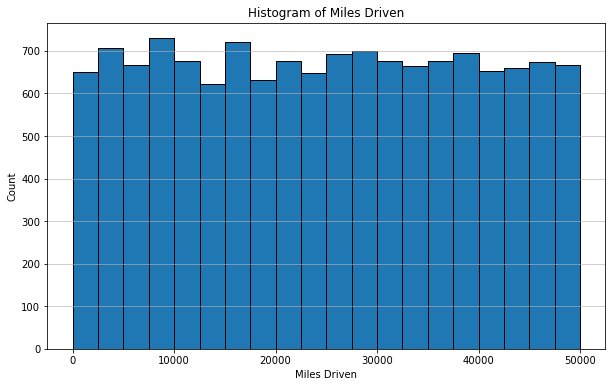

In [39]:
df['Miles Driven'] = df['Odom Reading 1 (Update)'] - df['Odom Reading 1 (Previous)']
df = df.dropna(subset=['Miles Driven'])
df['Miles Driven'] = df['Miles Driven'].clip(lower=0, upper=999999999)
plt.figure(figsize=(10, 6))
plt.hist(df['Miles Driven'], bins=20, color='tab:blue', edgecolor='black')
plt.title('Histogram of Miles Driven')
plt.xlabel('Miles Driven')
plt.ylabel('Count')
plt.grid(axis='y', alpha=0.75)
plt.show()

**Question 11** 
* Which distribution from the previous question does this follow most closely? Discuss what the identified distribution implies about the experiment participants' driving habits.

* Consider the following study by the UK's Ministry of Transport on the annual miles driven of UK vehicles (Figure 3) -- is our graph consistent with those [distributions](https://web.archive.org/web/20190724071433/https:/assets.publishing.service.gov.uk/government/uploads/system/uploads/attachment_data/file/206882/experimental-statistics-mot-data.pdf)

* Should there be just as many people driving 0 to 1,000 miles as there are people driving 49,000 to 50,000 miles? Does this raise any suspicions about the experiment's data? (Hint: also consider the number of people driving at or above 50,000 miles?)


*Replace This Text*

**Question 12** Think back to response in the previous section. Given your findings in this section, what would you as a peer-reviewer conclude about the paper's results? What feedback would you provide to the experiment's authors?

*Replace This Text*

**Question 13** 
In this lab, we recieved experiement data from our friend at the insurance agent and it reaffirmed our hypothesis. It can be tempting to not dig further into the data.

How might confirmation bias have affected the interpretation of our experimental data, especially when initial results seemed to support our hypothesis? If you were on the research team, what could you have done to ensure our data collection and experiment were preformed properly?

*Replace This Text*

**Question 14** Can "good science" give us faulty results? How could that happen? As an institution how can the scientific community guard against and uncover this kind of "bad science"? Why is it important to run multiple trials and conduct replication studies?

**^ Introduce the list of "bad" science, ask where this one should fall under?**

# Who is to blame? + Hanlon's Razor

While we may be quick to point fingers at academic misconduct in the context of such evidence but it is important to always consider Hanlon's Razor: "Never attribute to malice that which is adequately explained by stupidity."

Further, read this table from [Edwards et. al.](https://www.liebertpub.com/doi/pdf/10.1089/ees.2016.0223), this paper argues that "incentives for academic scientists have become increasingly perverse in terms of competition for research funding, development of quantitative metrics to measure performance, and a changing business model for higher education itself."

<img src="https://lh3.googleusercontent.com/pw/AP1GczP9iPllfvvvQvc3mXwy_tOadxeUtmroIQkLMYlk2N4haqvuc6aUALwD2G71Vf5RCR7THKl3rLwBxyzKlY4VtO0erwj48VycwbkVe2DmN4-Nc_YNTV6T=w2400" 
        alt="tax gap table" 
        width="500" 
        style="display: block; margin: 0 auto" />

**Question 10** Given these findings, what do you believe can be improved about the current state of academic publishing? How do you think we can improve it?

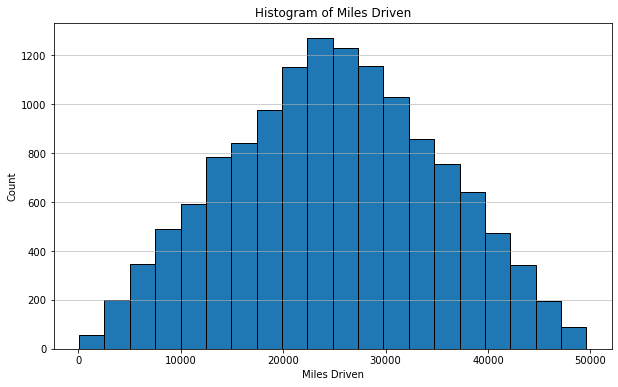

In [109]:
##WIP


inds = np.arange(0,13488)
colReadingOne = df['Odom Reading 1 (Previous)'].to_numpy()
colReadingOneNew = df['Odom Reading 1 (Update)'].to_numpy()
np.random.shuffle(inds)
diffShuffle = colReadingOneNew[inds] - colReadingOne[inds] 
diffPreShuffle = colReadingOneNew - colReadingOne
diffarr = (diffPreShuffle + diffShuffle) / 2

plt.figure(figsize=(10, 6))
plt.hist(diffarr, bins=20, color='tab:blue', edgecolor='black')
plt.title('Histogram of Miles Driven')
plt.xlabel('Miles Driven')
plt.ylabel('Count')
plt.grid(axis='y', alpha=0.75)
plt.show()